In [99]:
# Model with feature selection and scaling of data

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('winequality-red.csv', header = 0, delimiter=';')

# Prepare the data
X = df.drop(['quality'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Defining the pipeline 
pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('feature_selection', SelectFromModel(LinearSVC(max_iter=5000, dual=False, penalty='l1', random_state=42))),
    ('classification', RandomForestClassifier(random_state=42,bootstrap=True,class_weight='balanced',max_depth=17,min_samples_leaf=1,min_samples_split=4,n_estimators=292))
]).fit(X_train,y_train)

# Make prediction base on X_test
y_pred = pipe.predict(X_test)

# Print the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.76      0.74      0.75       140
           6       0.74      0.64      0.69       149
           7       0.53      0.75      0.62        28
           8       0.33      0.50      0.40         2

    accuracy                           0.69       320
   macro avg       0.39      0.44      0.41       320
weighted avg       0.73      0.69      0.71       320



c:\Users\amera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
# Final RFC model results removing scaling of data, feature selection and changing class-weight from 'balanced' to 'balanced_subsample'

# Defining the pipeline 
pipe = Pipeline([
    ('classification', RandomForestClassifier(random_state=42,bootstrap=True,class_weight='balanced_subsample',max_depth=17,min_samples_leaf=1,min_samples_split=4,n_estimators=292))
]).fit(X_train,y_train)

# Make prediction base on X_test
y_pred = pipe.predict(X_test)

# Print the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.76      0.75      0.76       139
           6       0.77      0.64      0.70       152
           7       0.50      0.74      0.60        27
           8       0.33      0.50      0.40         2

    accuracy                           0.70       320
   macro avg       0.39      0.44      0.41       320
weighted avg       0.74      0.70      0.71       320



c:\Users\amera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
# Obtaining classification report on fitted model showcasing final RFC model overfitting
y_pred_train = pipe.predict(X_train)

# Printing the classification report
print(classification_report(y_pred_train,y_train))



              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00       545
           6       1.00      1.00      1.00       510
           7       1.00      1.00      1.00       159
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



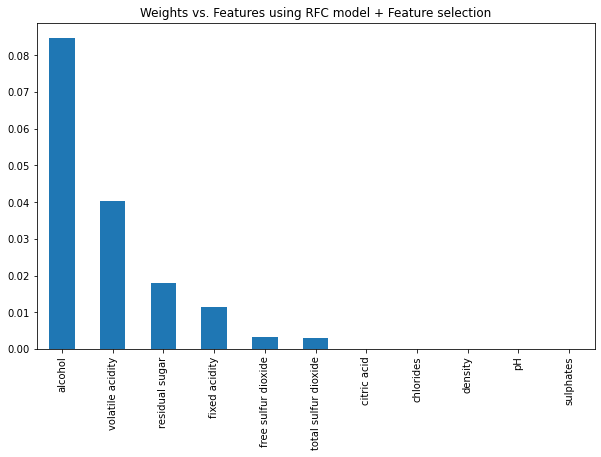

In [117]:
# Creating graph of results from LinearSVC feature selection

# Fiting LinearSVC model separately
feature_selector = LinearSVC(max_iter=100000, dual=False, penalty='l1', random_state=42, C=0.1)
feature_selector.fit(X_train, y_train)

# Getting the absolute values of the coefficients
weights = np.abs(feature_selector.coef_)[0]

# Creating a Series to map weights to their corresponding feature names
weights_list = pd.Series(weights, index=X_train.columns)

# Sortting the series for plotting
weights_list = weights_list.sort_values(ascending=False)

# Plotting the weights vs. the corresponding feature names
plt.figure(figsize=(10, 6))
weights_list.plot(kind='bar')
plt.title('Weights vs. Features using RFC model + Feature selection')
plt.show()



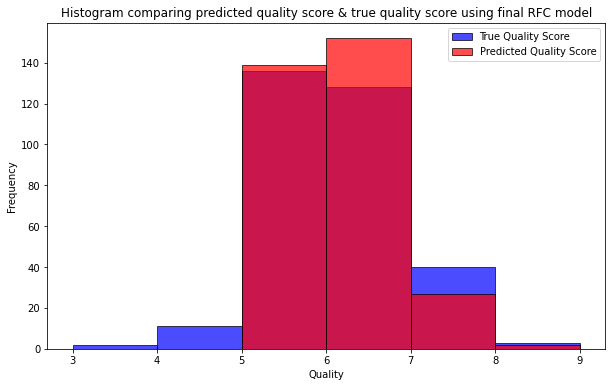

In [94]:
# Plotting histogram of final RFC model results without feature selection and scaling of data
plt.figure(figsize=(10,6))

plt.hist(y_test, bins=np.arange(y.min(), y.max()+2), alpha=0.7, label='True Quality Score', color='blue', edgecolor='black')
plt.hist(y_pred, bins=np.arange(y.min(), y.max()+2), alpha=0.7, label='Predicted Quality Score', color='red', edgecolor='black')

plt.title('Histogram comparing predicted quality score & true quality score using final RFC model')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [83]:
# Re-splitting data without stratifying to demonstrate base model results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Obtaining base RFC model results
pipe = Pipeline([
    ('classification', RandomForestClassifier(random_state=42))
]).fit(X_train,y_train)

# Make prediction base on X_test
y_pred = pipe.predict(X_test)

# Print the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.75      0.72      0.73       137
           6       0.69      0.63      0.66       145
           7       0.52      0.63      0.57        35
           8       0.00      0.00      0.00         2

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.69      0.66      0.67       320



c:\Users\amera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
# Re-splitting data with stratifying to demonstrate base model results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Obtaining base + stratifying RFC model results
pipe = Pipeline([
    ('classification', RandomForestClassifier(random_state=42))
]).fit(X_train,y_train)

# Making prediction base on X_test
y_pred = pipe.predict(X_test)

# Printing the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.76      0.71      0.73       147
           6       0.70      0.65      0.67       139
           7       0.55      0.71      0.62        31
           8       0.33      0.50      0.40         2

    accuracy                           0.68       320
   macro avg       0.39      0.43      0.40       320
weighted avg       0.71      0.68      0.69       320



c:\Users\amera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
